In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import urllib
#import folium
import json
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import scipy
import scipy.stats as sp
import scipy.optimize as op
import statsmodels.api as sm
from scipy.stats import linregress
from scipy.optimize import curve_fit
from scipy import stats

from datetime import datetime, date, timedelta
from matplotlib.backends.backend_pdf import PdfPages
#from matplotlib.pyplot import cm 
import platform
import sys
import glob

import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pyproj
from pyproj import Proj
#import simplekml

import os  
import csv

import wellapplication as wa

#import matplotlib
from pylab import rcParams
rcParams['figure.figsize'] = 15, 15

C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Weather Station Input

These scripts built input files for "Write Inpute Tables" --> "Weather Stations"

## Actual Stations

### Precip

In [2]:
#raw_data_folder = "E:/Google Drive/WORK/Round_Valley/Data/Climate/"
raw_data_folder = "F:/GIS/Ogden_Valley/SWAT_2017_09_11/climate/climate2/"
processed_data = raw_data_folder + "processed/"

idnum, stats, lat, long, elev = [],[],[],[],[]

i = 0
for file in glob.glob(raw_data_folder+'*.csv'):
    i += 1
    print(file)
    df = pd.read_csv(file, skiprows=16, index_col=0, 
                     usecols=[0,1], parse_dates=True, names = ['datetime','Precipitation'])
    df['Precipitation'] = pd.to_numeric(df['Precipitation'], errors='coerce') 
    df = df.resample('1D').max().interpolate(how='time')
    df.fillna(0.0,inplace=True)
    df['Precipitation'] = df['Precipitation'].apply(lambda x: round(x,2),1)
    df = df[(df.index >= pd.datetime(2000,1,1))&(df.index < pd.datetime(2017,1,1))]
    print(df['Precipitation'].max())
    print(df['Precipitation'].min())
    df.columns = [pd.datetime.strftime(df.index[0],'%Y%m%d')]

    stat = 'P' + str(i).zfill(3)
    df.to_csv(processed_data + stat + '.txt',index=False)
    statinfo = pd.read_csv(file, nrows=6, skiprows=1, index_col=0, names=['name','values'])
    stats.append(stat)
    lat.append(statinfo.loc['Latitude','values'])
    long.append(statinfo.loc['Longitude','values'])
    elev.append(statinfo.loc['Elevation','values'][:-2])
    idnum.append(i)

stations = pd.DataFrame({'ID':idnum,'NAME':stats,'LAT':lat,'LONG':long,'ELEVATION':elev})
stations = stations[['ID','NAME','LAT','LONG','ELEVATION']]
stations.to_csv(processed_data+'pcp.txt',index=False)

F:/GIS/Ogden_Valley/SWAT_2017_09_11/climate/climate2\UCC_ghcn_USC00422389_2017_09_12_1505215136.csv
50.8
0.0
F:/GIS/Ogden_Valley/SWAT_2017_09_11/climate/climate2\UCC_ghcn_USC00425826_2017_09_12_1505215157.csv
61.0
0.0
F:/GIS/Ogden_Valley/SWAT_2017_09_11/climate/climate2\UCC_ghcn_USC00426405_2017_09_12_1505215146.csv
56.9
0.0
F:/GIS/Ogden_Valley/SWAT_2017_09_11/climate/climate2\UCC_ghcn_USC00426869_2017_09_12_1505215141.csv
80.5
0.0
F:/GIS/Ogden_Valley/SWAT_2017_09_11/climate/climate2\UCC_ghcn_USR0000BUES_2017_09_12_1505215152.csv
0.0
0.0
F:/GIS/Ogden_Valley/SWAT_2017_09_11/climate/climate2\UCC_ghcn_USS0011H08S_2017_09_12_1505215234.csv
152.4
0.0
F:/GIS/Ogden_Valley/SWAT_2017_09_11/climate/climate2\UCC_ghcn_USS0011H21S_2017_09_12_1505215237.csv
58.4
0.0
F:/GIS/Ogden_Valley/SWAT_2017_09_11/climate/climate2\UCC_ghcn_USS0011H25S_2017_09_12_1505215131.csv
96.5
0.0
F:/GIS/Ogden_Valley/SWAT_2017_09_11/climate/climate2\UCC_ghcn_USS0011H30S_2017_09_12_1505215127.csv
121.9
0.0
F:/GIS/Ogden_Valle

### Temp

In [10]:
#raw_data_folder = "E:/Google Drive/WORK/Round_Valley/Data/Climate/"
#processed_data = raw_data_folder + "processed/"

idnum, stats, lat, long, elev = [],[],[],[],[]

i = 0
for file in glob.glob(raw_data_folder+'*.csv'):
    i += 1
    print(file)
    df = pd.read_csv(file, skiprows=15, index_col=0, 
                     usecols=['Day','Min Temperature','Max Temperature'], parse_dates=True)
    df['Min Temperature'] = pd.to_numeric(df['Min Temperature'], errors='coerce').resample('1D').mean().interpolate(how='time') 
    df['Max Temperature'] = pd.to_numeric(df['Max Temperature'], errors='coerce').resample('1D').mean().interpolate(how='time') 
    #df.fillna(0.0,inplace=True)
    df['Min Temperature'] = df['Min Temperature'].apply(lambda x: round(x,2),1)
    df['Max Temperature'] = df['Max Temperature'].apply(lambda x: round(x,2),1)

    df = df[(df.index >= pd.datetime(2000,1,1))&(df.index < pd.datetime(2017,1,1))]
    #print(df['Precipitation'].max())
    #print(df['Precipitation'].min())


    stat = 'OT' + str(i).zfill(3)
    df = df[['Min Temperature','Max Temperature']]
    df.columns = [pd.datetime.strftime(df.index[0],'%Y%m%d'),'to_drop']
        
    df.to_csv(processed_data + stat + '.txt',index=False)
    statinfo = pd.read_csv(file, nrows=6, skiprows=1, index_col=0, names=['name','values'])
    stats.append(stat[1:])
    lat.append(statinfo.loc['Latitude','values'])
    long.append(statinfo.loc['Longitude','values'])
    elev.append(statinfo.loc['Elevation','values'][:-2])
    idnum.append(i)

stations = pd.DataFrame({'ID':idnum,'NAME':stats,'LAT':lat,'LONG':long,'ELEVATION':elev})
stations = stations[['ID','NAME','LAT','LONG','ELEVATION']]
stations.to_csv(processed_data+'temp.txt',index=False)

H:/GIS/Ogden_Valley/SWAT_2017_09_11/climate/climate2\UCC_ghcn_USC00422389_2017_09_12_1505215136.csv
H:/GIS/Ogden_Valley/SWAT_2017_09_11/climate/climate2\UCC_ghcn_USC00425826_2017_09_12_1505215157.csv
H:/GIS/Ogden_Valley/SWAT_2017_09_11/climate/climate2\UCC_ghcn_USC00426405_2017_09_12_1505215146.csv
H:/GIS/Ogden_Valley/SWAT_2017_09_11/climate/climate2\UCC_ghcn_USC00426869_2017_09_12_1505215141.csv
H:/GIS/Ogden_Valley/SWAT_2017_09_11/climate/climate2\UCC_ghcn_USR0000BUES_2017_09_12_1505215152.csv
H:/GIS/Ogden_Valley/SWAT_2017_09_11/climate/climate2\UCC_ghcn_USS0011H08S_2017_09_12_1505215234.csv
H:/GIS/Ogden_Valley/SWAT_2017_09_11/climate/climate2\UCC_ghcn_USS0011H21S_2017_09_12_1505215237.csv
H:/GIS/Ogden_Valley/SWAT_2017_09_11/climate/climate2\UCC_ghcn_USS0011H25S_2017_09_12_1505215131.csv
H:/GIS/Ogden_Valley/SWAT_2017_09_11/climate/climate2\UCC_ghcn_USS0011H30S_2017_09_12_1505215127.csv
H:/GIS/Ogden_Valley/SWAT_2017_09_11/climate/climate2\UCC_ghcn_USS0011H31S_2017_09_12_1505215166.csv


In [11]:
outfolder = processed_data+'cleanedtemp/'

word = ',to_drop'

for infile in glob.glob(processed_data+"O*.txt"):
    fin = open(infile)
    outfile = processed_data+os.path.basename(infile)[1:]
    fout = open(outfile, "w+")
    for line in fin:
        line = line.replace(word, "")
        fout.write(line)
    fin.close()
    fout.close()
    print(outfile)

H:/GIS/Ogden_Valley/SWAT_2017_09_11/climate/climate2/processed/T001.txt
H:/GIS/Ogden_Valley/SWAT_2017_09_11/climate/climate2/processed/T002.txt
H:/GIS/Ogden_Valley/SWAT_2017_09_11/climate/climate2/processed/T003.txt
H:/GIS/Ogden_Valley/SWAT_2017_09_11/climate/climate2/processed/T004.txt
H:/GIS/Ogden_Valley/SWAT_2017_09_11/climate/climate2/processed/T005.txt
H:/GIS/Ogden_Valley/SWAT_2017_09_11/climate/climate2/processed/T006.txt
H:/GIS/Ogden_Valley/SWAT_2017_09_11/climate/climate2/processed/T007.txt
H:/GIS/Ogden_Valley/SWAT_2017_09_11/climate/climate2/processed/T008.txt
H:/GIS/Ogden_Valley/SWAT_2017_09_11/climate/climate2/processed/T009.txt
H:/GIS/Ogden_Valley/SWAT_2017_09_11/climate/climate2/processed/T010.txt
H:/GIS/Ogden_Valley/SWAT_2017_09_11/climate/climate2/processed/T011.txt
H:/GIS/Ogden_Valley/SWAT_2017_09_11/climate/climate2/processed/T012.txt
H:/GIS/Ogden_Valley/SWAT_2017_09_11/climate/climate2/processed/T013.txt
H:/GIS/Ogden_Valley/SWAT_2017_09_11/climate/climate2/processed/T

## PRISM Data

Processes files downloaded from http://www.prism.oregonstate.edu/explorer/

### Precip

In [4]:
raw_data_folder = "E:/PROJECTS/Round_Valley/SWAT/climate/"
processed_data = raw_data_folder + "processed/"
stats, lat, long,elev,idnum = [],[],[],[],[]
i = 0

inProj = pyproj.Proj(init='epsg:4326')
outProj = pyproj.Proj('+proj=aea +lat_1=29.5 +lat_2=45.5 +lat_0=37.5 +lon_0=-96 +x_0=0 +y_0=0 +datum=NAD83 +units=m +no_defs')

for file in glob.glob(raw_data_folder+'*.csv'):
    i += 1
    #print(file)
    df = pd.read_csv(file, skiprows=11, index_col=0, 
                     usecols=[0,1], parse_dates=True, names = ['datetime','Precipitation'])
    df['Precipitation'] = pd.to_numeric(df['Precipitation'], errors='coerce') 
    df = df.resample('1D').max().interpolate(how='time')
    df.fillna(0.0,inplace=True)
    df['Precipitation'] = df['Precipitation'].apply(lambda x: round(x,2),1)
    df = df[(df.index >= pd.datetime(2000,1,1))&(df.index <= pd.datetime(2018,1,1))]
    #print(df['Precipitation'].max(),df['Precipitation'].min())
    df.columns = [pd.datetime.strftime(df.index[0],'%Y%m%d')]

    stat = 'P' + str(i).zfill(3)
    parsename = str(file).split('_')
    
    df.to_csv(processed_data + stat + '.txt',index=False)

    stats.append(stat)
    latitude = parsename[-2]
    longitude = parsename[-1][:-4]
    y2 = parsename[-2]
    x2 = parsename[-1][:-4]
    
    #x2,y2 = pyproj.transform(inProj,outProj,longitude,latitude)
    
    lat.append(y2)
    long.append(x2)
    elevation = wa.get_elev([longitude,latitude])
    elev.append(elevation)
    #print(longitude,latitude,elevation)
    idnum.append(i)

stations = pd.DataFrame({'ID':idnum,'NAME':stats,'LAT':lat,'LONG':long,'ELEVATION':elev})
stations = stations[['ID','NAME','LAT','LONG','ELEVATION']]
stations.to_csv(processed_data + 'pcp.txt',index=False)  

### Temp

In [6]:
#raw_data_folder = "E:/Google Drive/WORK/Round_Valley/Data/Climate/"
#processed_data = raw_data_folder + "processed/"

idnum, stats, lat, long, elev = [],[],[],[],[]

i = 0
for file in glob.glob(raw_data_folder+'*.csv'):
    i += 1
    print(file)
    df = pd.read_csv(file, skiprows=10, index_col=0, 
                     usecols=['Date','tmin (degrees C)','tmax (degrees C)'], parse_dates=True)
    df['Min Temperature'] = pd.to_numeric(df['tmin (degrees C)'], errors='coerce').resample('1D').mean().interpolate(how='time') 
    df['Max Temperature'] = pd.to_numeric(df['tmax (degrees C)'], errors='coerce').resample('1D').mean().interpolate(how='time') 
    #df.fillna(0.0,inplace=True)
    df['Min Temperature'] = df['Min Temperature'].apply(lambda x: round(x,2),1)
    df['Max Temperature'] = df['Max Temperature'].apply(lambda x: round(x,2),1)

    df = df[(df.index >= pd.datetime(2000,1,1))&(df.index <= pd.datetime(2018,1,1))]
    #print(df['Precipitation'].max())
    #print(df['Precipitation'].min())


    stat = 'OT' + str(i).zfill(3)
    df = df[['Min Temperature','Max Temperature']]
    df.columns = [pd.datetime.strftime(df.index[0],'%Y%m%d'),'to_drop']
        
    df.to_csv(processed_data + stat + '.txt',index=False)
    
    parsename = str(file).split('_')
    
    stats.append(stat)
    latitude = parsename[-2]
    longitude = parsename[-1][:-4]
    
    y2 = parsename[-2]
    x2 = parsename[-1][:-4]
    
    #x2,y2 = pyproj.transform(inProj,outProj,longitude,latitude)
    
    lat.append(y2)
    long.append(x2)
    elevation = wa.get_elev([longitude,latitude])
    elev.append(elevation)
    print(longitude,latitude,elevation)
    idnum.append(i)
    


stations = pd.DataFrame({'ID':idnum,'NAME':stats,'LAT':lat,'LONG':long,'ELEVATION':elev})
stations = stations[['ID','NAME','LAT','LONG','ELEVATION']]
stations.to_csv(processed_data+'temp.txt',index=False)

E:/PROJECTS/Round_Valley/SWAT/climate\PRISM_ppt_tmin_tmax_provisional_4km_20000101_20171231_40.3054_-111.3042.csv
-111.3042 40.3054 2834.65
E:/PROJECTS/Round_Valley/SWAT/climate\PRISM_ppt_tmin_tmax_provisional_4km_20000101_20171231_40.3300_-111.3393.csv
-111.3393 40.3300 2541.11
E:/PROJECTS/Round_Valley/SWAT/climate\PRISM_ppt_tmin_tmax_provisional_4km_20000101_20171231_40.3342_-111.4162.csv
-111.4162 40.3342 2056.37
E:/PROJECTS/Round_Valley/SWAT/climate\PRISM_ppt_tmin_tmax_provisional_4km_20000101_20171231_40.3718_-111.4114.csv
-111.4114 40.3718 1760.83
E:/PROJECTS/Round_Valley/SWAT/climate\PRISM_ppt_tmin_tmax_provisional_4km_20000101_20171231_40.3760_-111.4896.csv
-111.4896 40.3760 2535.04
E:/PROJECTS/Round_Valley/SWAT/climate\PRISM_ppt_tmin_tmax_provisional_4km_20000101_20171231_40.3792_-111.3351.csv
-111.3351 40.3792 2638.79
E:/PROJECTS/Round_Valley/SWAT/climate\PRISM_ppt_tmin_tmax_provisional_4km_20000101_20171231_40.3860_-111.4519.csv
-111.4519 40.3860 1760.66
E:/PROJECTS/Round_Va

# Dams

Created Reservoir input data for ArcSWAT. Used in "Edit SWAT Input" --> "Reservoirs" --> "Reservoir Management"<br>
"RESMONO" and "RESDAYO"

In [4]:
damdata = pd.read_csv('F:/GIS/Ogden_Valley/SWAT_2017_11_21/Dams/USBR_dam_Data.csv',skiprows=5)

In [5]:
damdata['Site ID'].unique()

array(['causey', 'pineview'], dtype=object)

In [6]:
def rels_conv(df):
    df['RESOUTFLOW'] = df['Value'].apply(lambda x: round(x*0.0283168,3),1) 

    df['DATE'] = pd.to_datetime(df['Date'])
    df.set_index('DATE',inplace=True)
    df['RESOUTFLOW'] = df['RESOUTFLOW'].interpolate(method='time')
    df.reset_index(inplace=True)
    df = df[['DATE','RESOUTFLOW']]

    df['DATE'] = df['DATE'].apply(lambda x: '{:}/{:}/{:}'.format(x.month,x.day,x.year),1)
    return df

In [22]:
def stor_conv(damdata, dam='causey'):
    df = damdata[(damdata['Site ID']==dam)&(damdata['Parameter']=='Reservoir Storage')]
    
    df['RESTOR'] = df['Value'].apply(lambda x: round(x*0.12*10000,0),1) 

    df['DATE'] = pd.to_datetime(df['Date'])
    df.set_index('DATE',inplace=True)
    df['RESTOR'] = df['RESTOR'].interpolate(method='time')
    df['RESTOR'] = df['RESTOR'].apply(lambda x: int(x),1)
    df = df[(df.index >= pd.datetime(2010,1,1))& (df.index < pd.datetime(2017,1,1))]
    df['sequence'] = range(1,len(df)+1)
    df['rowlab'] = df.index.map('RES_VOL_{0:%Y}_{0:%j}'.format)
    df.reset_index(inplace=True)
    df = df[['sequence','rowlab','RESTOR']]
    df.to_clipboard(index=False)
    return df

## Causey

### Daily Input

In [23]:
stor_conv(damdata)
#caus_stor = damdata[(damdata['Site ID']=='causey')&(damdata['Parameter']=='Reservoir Storage')]
caus_rels = damdata[(damdata['Site ID']=='causey')&(damdata['Parameter']=='Reservoir Release')]
caus_rels = rels_conv(caus_rels)

#caus_rels.to_csv('H:/GIS/Ogden_Valley/SWAT_2017_11_21/Dams/ResdayoCaus.txt',index=False,
#                 header=['"DATE"','"RESOUTFLOW"'],quotechar="\'")

C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

In [10]:
caus_stor

,Site,Site ID,Parameter,Date,Value,Units,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,CAUSEY RESERVOIR,causey,Reservoir Storage,1/1/2000 0:00,4143.0,Acre feet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CAUSEY RESERVOIR,causey,Reservoir Storage,1/2/2000 0:00,NaN,Acre feet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CAUSEY RESERVOIR,causey,Reservoir Storage,1/3/2000 0:00,4143.0,Acre feet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CAUSEY RESERVOIR,causey,Reservoir Storage,1/4/2000 0:00,NaN,Acre feet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CAUSEY RESERVOIR,causey,Reservoir Storage,1/5/2000 0:00,NaN,Acre feet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,CAUSEY RESERVOIR,causey,Reservoir Storage,1/6/2000 0:00,NaN,Acre feet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,CAUSEY RESERVOIR,causey,Reservoir Storage,1/7/2000 0:00,4143.0,Acre feet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,CAUSEY RESERVOIR,causey,Reservoir Storage,1/8/2000 0:00,NaN,Acre feet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,CAUSEY RESERVOIR,causey,Reservoir Storage,1/9/2000 0:00,NaN,Acre feet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,CAUSEY RESERVOIR,causey,Reservoir Storage,1/10/2000 0:00,4153.0,Acre feet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


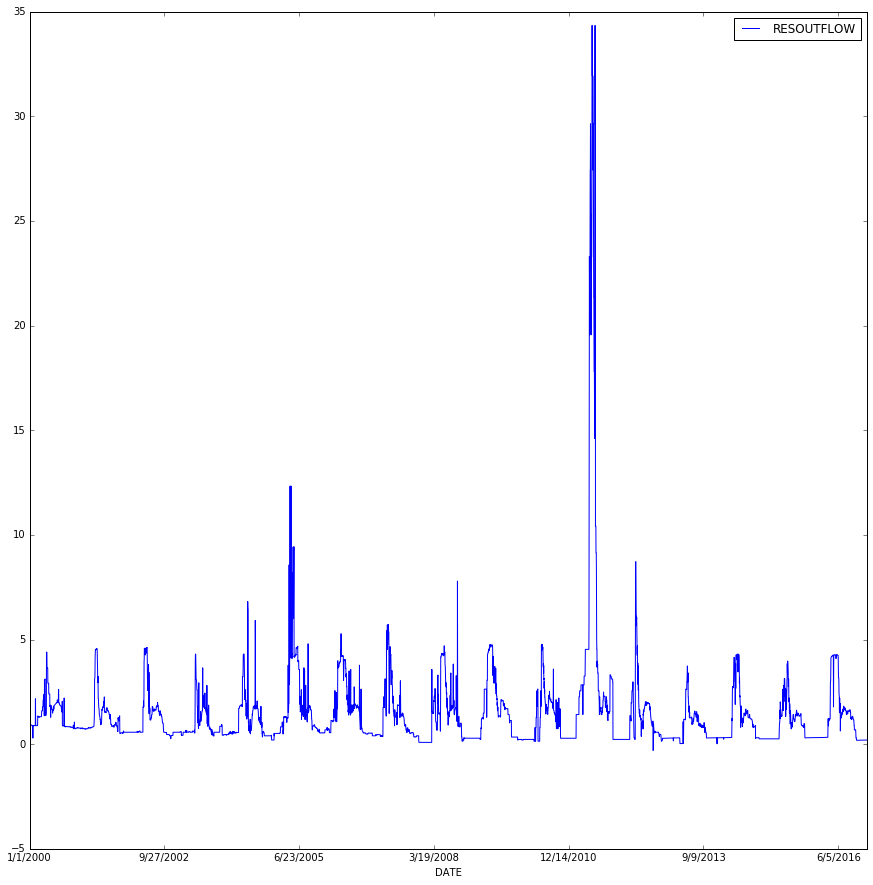

In [25]:
causy = caus_rels.set_index('DATE')
causy.plot()

In [26]:
caus_rels = damdata[(damdata['Site ID']=='causey')&(damdata['Parameter']=='Reservoir Release')]
caus_rels = rels_conv(caus_rels)
caus_rels['DATE'] = caus_rels['DATE'].apply(lambda x: pd.to_datetime(x),1)
caus_rels.set_index('DATE',inplace=True)
caus_mon = caus_rels.groupby(pd.TimeGrouper('MS')).mean()

caus_mon['Year'] = caus_mon.index.year
caus_mon['Month'] = caus_mon.index.month
caus_mon.set_index(['Year','Month'],inplace=True)
caus_mon = caus_mon.unstack()
caus_mon.columns = caus_mon.columns.droplevel(0)

C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

In [27]:
caus_mon.columns = ["Resout1","Resout2","Resout3","Resout4","Resout5","Resout6",
                    "Resout7","Resout8","Resout9","Resout10","Resout11","Resout12"]

In [28]:
caus_mon

,Resout1,Resout2,Resout3,Resout4,Resout5,Resout6,Resout7,Resout8,Resout9,Resout10,Resout11,Resout12
Year,,,,,,,,,,,,
2000,0.845194,0.951448,1.312290,2.065900,2.836710,1.706900,1.955194,1.888871,0.905867,0.835516,0.799067,0.766161
2001,0.762581,0.735000,0.767935,1.127833,3.607774,1.342600,1.711645,1.350000,0.878533,0.992839,0.539867,0.571000
2002,0.571000,0.571000,0.593774,1.032200,4.166548,1.771100,1.670581,1.642677,0.991200,0.502871,0.403367,0.571000
2003,0.578226,0.501929,0.594032,0.585067,2.073419,1.190200,1.858581,1.182194,0.553767,0.571000,0.753033,0.445774
2004,0.496484,0.543966,0.552839,1.904367,2.842613,1.971567,1.441677,1.933871,0.892167,0.437258,0.400933,0.317871
2005,0.514000,0.782679,1.268419,4.074533,5.640968,3.924000,1.775645,1.664161,1.516733,0.846419,0.619833,0.542032
2006,0.702645,0.858357,1.352613,3.581133,4.092161,2.581567,1.746774,1.868290,1.418667,0.576258,0.505900,0.474581
2007,0.430226,0.422250,1.874226,4.269200,2.678194,1.455567,1.678129,1.019516,0.634233,0.477355,0.354267,0.086000
2008,0.086000,0.086000,1.790677,1.394533,3.525290,3.078700,1.681226,1.780032,1.510600,0.458710,0.285000,0.285000


In [29]:

caus_mon = caus_mon.unstack()
caus_mon = ["Resout1","Resout2","Resout3","Resout4","Resout5",
                    "Resout6","Resout7","Resout8","Resout9","Resout10","Resout11","Resout12"]

In [9]:
caus_stor = damdata[(damdata['Site ID']=='causey')&(damdata['Parameter']=='Reservoir Storage')]


## Pineview

In [24]:
pine_stor = damdata[(damdata['Site ID']=='pineview')&(damdata['Parameter']=='Reservoir Storage')]
pine_rels = damdata[(damdata['Site ID']=='pineview')&(damdata['Parameter']=='Reservoir Release')]
pine_rels = rels_conv(pine_rels)
pine_rels.to_csv('F:/GIS/Ogden_Valley/SWAT_2017_11_21/Dams/ResdayoPine.txt',index=False,
                 header=['"DATE"','"RESOUTFLOW"'],quotechar="\'")

C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

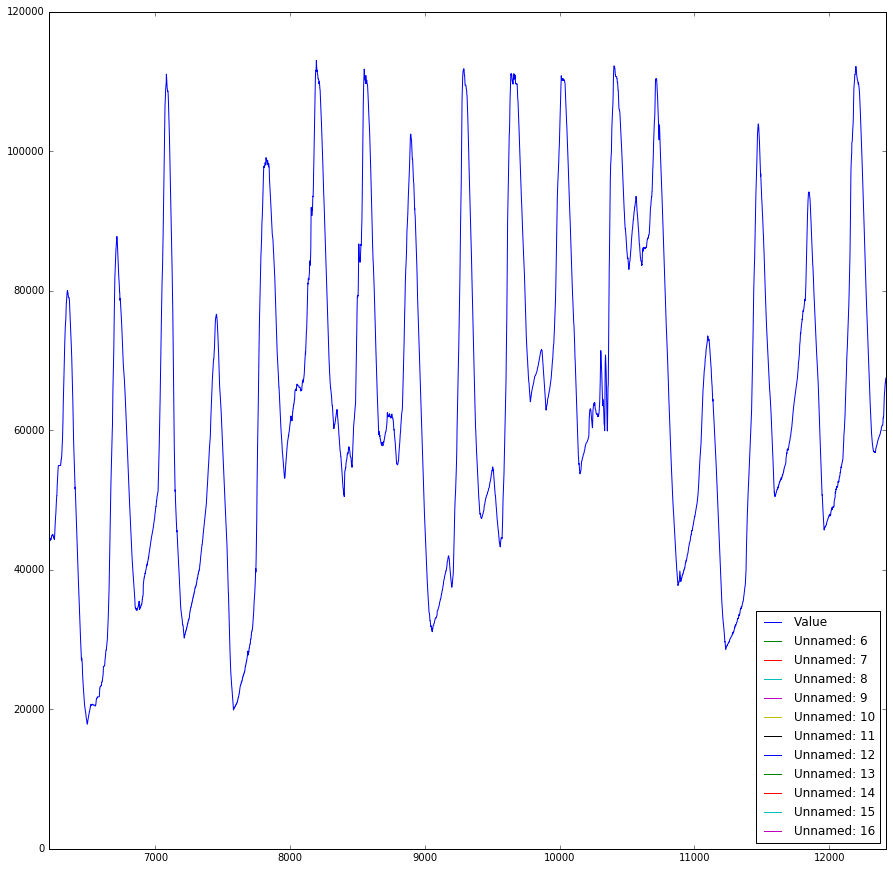

In [25]:
pine_stor.plot()

In [33]:
pine_rels = damdata[(damdata['Site ID']=='pineview')&(damdata['Parameter']=='Reservoir Release')]

In [34]:
pine_rels = damdata[(damdata['Site ID']=='pineview')&(damdata['Parameter']=='Reservoir Release')]
pine_rels['RESOUTFLOW'] = pine_rels['Value'].apply(lambda x: round(x*0.0283168,2),1) 
pine_rels['DATE'] = pd.to_datetime(pine_rels['Date'])

pine_rels.set_index('DATE',inplace=True)
pine_rels = pine_rels[(pine_rels.index >= pd.datetime(2010,1,1))& (pine_rels.index < pd.datetime(2017,1,1))]
pine_rels['sequence'] = range(1,len(pine_rels)+1)
pine_rels['rowlab'] = pine_rels.index.map('FLOW_OUT_{0:%Y}_{0:%j}'.format)

pine_rels = pine_rels[['sequence','rowlab','RESOUTFLOW']]

pine_rels.to_clipboard(sep='\t',index=False)

C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [16]:
pn_df = pine_rels['RESOUTFLOW'].apply(lambda x: "    {:}".format(x),1)
pn_df.to_clipboard(sep='\t',index=False)

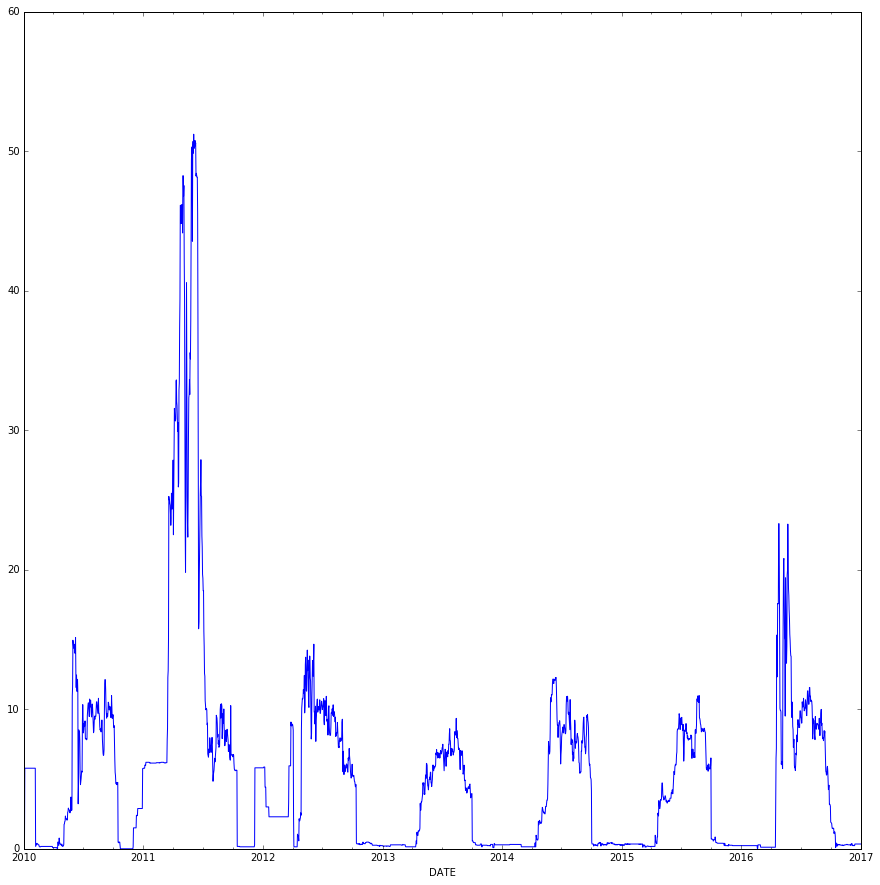

In [19]:
pine_rels['RESOUTFLOW'].plot()

In [ ]:
res_df['sequence'] = range(1,len(res_df)+1)
res_df['rowlab'] = res_df.index.map('RES_VOL_{0:%Y}_{0:%j}'.format)


In [18]:
pine_rels

,sequence,rowlab,RESOUTFLOW
DATE,,,
2010-01-01,1,FLOW_OUT_2010_001,0.23
2010-01-02,2,FLOW_OUT_2010_002,0.23
2010-01-03,3,FLOW_OUT_2010_003,0.25
2010-01-04,4,FLOW_OUT_2010_004,5.78
2010-01-05,5,FLOW_OUT_2010_005,5.78
2010-01-06,6,FLOW_OUT_2010_006,5.78
2010-01-07,7,FLOW_OUT_2010_007,5.78
2010-01-08,8,FLOW_OUT_2010_008,5.78
2010-01-09,9,FLOW_OUT_2010_009,5.78


In [ ]:
    0.23
    0.23
    0.25
    5.78
    5.78
    5.78
    5.78
    5.78
    5.78
    5.78
    5.78
    5.78
    5.78
    5.78
    5.78
    5.78
    5.78
    5.78
    5.78
    5.78
    5.78
    5.78
    5.78
    5.78
    5.78
    5.78
    5.78
    5.78
    5.78
    5.78
    5.78
    5.78
    5.78
    5.78
    5.78
    5.78
    0.17
    0.23
    0.28
    0.34
    0.4
    0.34
    0.34
    0.34
    0.28
    0.28
    0.28
    0.17
    0.14
    0.14
    0.14
    0.14
    0.17
    0.17
    0.17
    0.17
    0.17
    0.17
    0.17
    0.17
    0.17
    0.17
    0.17
    0.17
    0.17
    0.17
    0.17
    0.17
    0.17
    0.17
    0.17
    0.17
    0.17
    0.17
    0.17
    0.17
    0.17
    0.17
    0.17
    0.17
    0.17
    0.17
    0.17
    0.17
    0.17
    0.17
    0.17
    0.17
    0.08
    0.08
    0.08
    0.08
    0.08
    0.08
    0.08
    0.08
    0.08
    0.08
    0.08
    0.08
    0.08
    0.08
    0.0
    0.0
    0.48
    0.48
    0.26
    0.26
    0.77
    0.48
    0.4
    0.34
    0.34
    0.29
    0.29
    0.26
    0.34
    0.2
    0.17
    0.2
    0.2
    0.2
    0.31
    1.76
    1.78
    1.96
    1.98
    2.35
    2.15
    2.15
    2.15
    2.07
    2.12
    2.07
    2.63
    2.66
    2.92
    2.83
    2.8
    2.78
    2.69
    2.58
    2.72
    2.72
    3.71
    2.83
    2.75
    2.8
    10.96
    11.61
    14.95
    14.64
    14.4
    14.38
    14.46
    14.66
    14.02
    14.12
    15.15
    12.52
    11.55
    12.46
    11.33
    11.27
    12.15
    11.24
    3.23
    4.45
    8.52
    8.32
    8.39
    7.77
    5.43
    4.6
    4.8
    5.03
    5.37
    5.57
    5.5
    9.17
    10.34
    9.21
    8.31
    8.55
    8.98
    8.82
    8.78
    9.17
    7.91
    7.88
    7.85
    7.88
    7.81
    7.89
    9.55
    9.94
    10.29
    10.47
    10.39
    9.88
    9.48
    10.73
    10.54
    10.17
    10.65
    10.25
    9.69
    9.45
    10.06
    10.38
    10.14
    9.59
    8.87
    8.32
    8.44
    9.11
    9.51
    9.28
    9.51
    9.49
    9.49
    10.0
    10.53
    10.53
    10.25
    10.02
    9.71
    10.22
    10.79
    9.71
    9.71
    9.49
    8.78
    8.52
    8.59
    8.47
    8.38
    8.54
    9.22
    9.22
    7.87
    7.3
    6.85
    6.7
    6.73
    7.08
    9.69
    11.81
    12.13
    12.11
    11.42
    10.21
    9.72
    9.37
    9.54
    9.68
    9.49
    9.82
    10.51
    10.44
    10.26
    9.95
    10.04
    10.19
    10.16
    9.62
    9.41
    9.54
    10.98
    10.01
    9.35
    9.39
    9.62
    9.57
    8.91
    8.71
    8.82
    7.52
    6.34
    5.48
    5.25
    4.75
    4.65
    4.75
    4.6
    4.61
    4.71
    4.75
    0.47
    0.47
    0.43
    0.48
    0.48
    0.48
    0.2
    0.0
    0.0
    0.0
    0.0
    0.0
    0.0
    0.0
    0.0
    0.0
    0.0
    0.0
    0.0
    0.0
    0.0
    0.0
    0.0
    0.0
    0.0
    0.0
    0.0
    0.0
    0.0
    0.0
    0.0
    0.0
    0.0
    0.0
    0.0
    0.0
    0.0
    0.0
    0.0
    0.0
    0.0
    0.0
    0.0
    0.0
    0.0
    0.0
    0.14
    1.5
    1.5
    1.5
    1.5
    1.5
    1.5
    1.5
    1.5
    1.5
    2.41
    2.38
    2.38
    2.38
    2.89
    2.89
    2.89
    2.89
    2.89
    2.89
    2.89
    2.89
    2.89
    2.89
    2.89
    2.89
    2.89
    2.89
    2.89
    5.75
    5.75
    5.78
    5.78
    5.78
    5.78
    5.78
    6.0
    5.97
    5.97
    6.2
    6.2
    6.2
    6.2
    6.2
    6.2
    6.2
    6.2
    6.2
    6.2
    6.2
    6.17
    6.14
    6.17
    6.14
    6.14
    6.14
    6.14
    6.14
    6.14
    6.14
    6.14
    6.14
    6.14
    6.14
    6.14
    6.14
    6.14
    6.14
    6.14
    6.14
    6.14
    6.17
    6.17
    6.17
    6.17
    6.17
    6.17
    6.17
    6.17
    6.17
    6.14
    6.17
    6.17
    6.17
    6.17
    6.2
    6.2
    6.2
    6.2
    6.2
    6.2
    6.2
    6.2
    6.2
    6.17
    6.17
    6.17
    6.14
    6.14
    6.17
    6.17
    6.17
    6.17
    6.17
    7.82
    8.64
    12.29
    12.77
    15.06
    25.26
    25.0
    25.0
    24.75
    24.64
    24.04
    23.19
    23.7
    25.49
    24.92
    24.35
    25.6
    25.32
    27.86
    22.51
    25.51
    27.75
    31.57
    31.01
    30.92
    30.67
    30.81
    33.53
    33.61
    32.05
    31.77
    30.67
    29.93
    30.55
    25.94
    26.22
    32.88
    33.39
    37.35
    39.42
    46.13
    46.13
    45.56
    44.83
    46.13
    46.18
    45.76
    44.15
    48.25
    48.25
    46.78
    47.54
    42.25
    39.42
    30.95
    22.65
    19.82
    25.82
    34.09
    40.58
    34.09
    25.26
    23.25
    22.34
    25.17
    29.62
    32.34
    32.56
    33.64
    32.56
    35.57
    35.11
    37.83
    43.78
    49.36
    50.18
    50.32
    43.55
    50.26
    50.72
    49.87
    51.23
    50.21
    50.35
    50.35
    50.77
    50.46
    50.6
    48.22
    48.42
    48.25
    48.14
    48.14
    45.56
    37.29
    24.55
    15.77
    16.28
    19.48
    21.24
    23.28
    25.4
    26.36
    27.89
    25.32
    25.26
    22.43
    21.63
    19.68
    19.4
    18.49
    18.52
    15.57
    14.5
    12.57
    12.37
    10.62
    10.31
    9.97
    10.02
    10.05
    9.94
    8.89
    9.0
    6.8
    6.68
    6.57
    6.85
    7.16
    6.91
    7.96
    7.62
    7.33
    7.19
    6.91
    7.42
    7.59
    7.99
    7.33
    6.09
    4.84
    5.3
    5.47
    5.64
    6.12
    6.48
    6.23
    6.57
    6.82
    7.25
    9.57
    9.46
    9.37
    8.98
    8.01
    8.21
    7.5
    7.76
    7.28
    7.33
    7.33
    8.75
    10.0
    10.34
    9.37
    10.39
    10.39
    10.22
    7.9
    8.64
    9.2
    9.71
    9.0
    10.02
    8.75
    7.99
    7.39
    7.65
    8.01
    8.5
    8.41
    7.7
    8.48
    8.57
    8.31
    8.04
    7.79
    6.98
    7.35
    7.47
    7.37
    6.57
    6.38
    6.35
    10.26
    6.84
    6.74
    6.71
    6.71
    6.74
    6.6
    6.74
    6.77
    6.71
    6.12
    5.74
    5.64
    5.62
    5.6
    5.62
    5.65
    5.62
    5.62
    5.62
    0.17
    0.17
    0.17
    0.17
    0.17
    0.17
    0.17
    0.17
    0.14
    0.14
    0.14
    0.14
    0.14
    0.14
    0.14
    0.14
    0.14
    0.14
    0.14
    0.14
    0.14
    0.14
    0.14
    0.14
    0.14
    0.14
    0.14
    0.14
    0.14
    0.14
    0.14
    0.14
    0.14
    0.14
    0.14
    0.14
    0.14
    0.14
    0.14
    0.14
    0.14
    0.14
    0.14
    0.14
    0.14
    0.14
    0.14
    0.14
    0.14
    0.14
    0.14
    0.14
    0.14
    0.28
    5.8
    5.8
    5.8
    5.8
    5.8
    5.8
    5.8
    5.8
    5.8
    5.8
    5.8
    5.8
    5.8
    5.8
    5.8
    5.8
    5.8
    5.8
    5.8
    5.8
    5.8
    5.8
    5.8
    5.8
    5.8
    5.8
    5.8
    5.86
    5.86
    5.86
    5.86
    4.42
    4.42
    4.42
    3.0
    3.0
    3.0
    3.0
    3.0
    3.0
    3.0
    3.0
    3.0
    2.29
    2.29
    2.29
    2.29
    2.29
    2.29
    2.29
    2.29
    2.29
    2.29
    2.29
    2.29
    2.29
    2.29
    2.29
    2.29
    2.29
    2.29
    2.29
    2.29
    2.29
    2.29
    2.29
    2.29
    2.29
    2.29
    2.29
    2.29
    2.29
    2.29
    2.29
    2.29
    2.29
    2.29
    2.29
    2.29
    2.29
    2.29
    2.29
    2.29
    2.29
    2.29
    2.29
    2.29
    2.29
    2.29
    2.29
    2.29
    2.29
    2.29
    2.29
    2.29
    2.29
    2.29
    2.29
    2.29
    2.29
    2.29
    2.29
    2.29
    3.28
    5.95
    5.95
    5.95
    5.95
    5.95
    5.95
    9.09
    8.81
    9.0
    8.86
    8.89
    8.92
    8.78
    8.5
    2.27
    0.17
    0.14
    0.14
    0.14
    0.14
    0.14
    0.14
    0.14
    0.14
    0.14
    0.14
    1.05
    0.96
    0.93
    0.82
    0.57
    2.15
    2.01
    2.01
    2.12
    2.24
    2.58
    2.41
    8.52
    10.08
    10.43
    10.79
    10.73
    10.85
    11.41
    11.13
    11.36
    12.43
    9.74
    10.25
    13.2
    13.73
    12.49
    11.33
    11.3
    13.11
    14.24
    12.77
    13.54
    12.01
    10.28
    10.14
    12.69
    13.82
    13.79
    12.26
    12.01
    9.54
    7.87
    8.24
    10.88
    12.02
    13.51
    13.26
    12.38
    13.59
    14.67
    9.8
    9.8
    8.95
    9.66
    10.22
    7.7
    9.2
    9.6
    10.34
    10.7
    10.73
    9.8
    10.06
    10.18
    10.19
    9.95
    9.98
    10.68
    9.72
    9.71
    9.99
    10.24
    10.51
    10.58
    10.34
    9.98
    10.17
    10.19
    10.34
    10.76
    9.19
    8.89
    10.55
    10.62
    9.68
    9.63
    9.54
    10.93
    9.91
    9.15
    9.29
    8.83
    8.16
    8.58
    10.08
    10.25
    8.81
    8.29
    8.14
    8.14
    8.14
    8.69
    9.75
    9.74
    9.84
    10.04
    9.89
    9.57
    10.32
    9.48
    9.87
    9.78
    9.72
    9.45
    9.09
    9.44
    8.05
    8.29
    8.16
    8.33
    8.33
    9.06
    8.47
    8.01
    7.28
    7.36
    7.25
    7.79
    7.73
    7.96
    7.87
    7.7
    7.87
    7.79
    7.87
    9.06
    9.29
    7.76
    5.52
    6.99
    6.23
    5.32
    5.95
    6.0
    6.0
    5.55
    5.83
    5.78
    5.97
    6.09
    6.03
    5.86
    5.52
    5.49
    6.51
    6.34
    6.54
    7.19
    6.68
    6.4
    5.89
    5.52
    5.21
    5.07
    5.15
    5.41
    6.06
    5.35
    5.21
    5.18
    5.24
    5.27
    5.01
    4.84
    4.81
    4.64
    4.45
    4.62
    4.59
    0.41
    0.36
    0.36
    0.36
    0.36
    0.37
    0.33
    0.33
    0.37
    0.36
    0.37
    0.29
    0.31
    0.31
    0.31
    0.34
    0.31
    0.31
    0.31
    0.31
    0.48
    0.4
    0.4
    0.4
    0.37
    0.37
    0.37
    0.37
    0.45
    0.45
    0.45
    0.48
    0.48
    0.48
    0.48
    0.48
    0.48
    0.48
    0.45
    0.45
    0.45
    0.45
    0.37
    0.37
    0.37
    0.4
    0.4
    0.34
    0.34
    0.25
    0.25
    0.26
    0.26
    0.26
    0.26
    0.26
    0.26
    0.26
    0.26
    0.26
    0.26
    0.26
    0.26
    0.26
    0.23
    0.23
    0.23
    0.23
    0.23
    0.23
    0.17
    0.17
    0.26
    0.23
    0.23
    0.23
    0.23
    0.23
    0.23
    0.23
    0.23
    0.2
    0.17
    0.17
    0.17
    0.2
    0.2
    0.2
    0.2
    0.2
    0.2
    0.2
    0.2
    0.17
    0.2
    0.2
    0.2
    0.2
    0.2
    0.2
    0.17
    0.17
    0.17
    0.17
    0.28
    0.28
    0.28
    0.28
    0.28
    0.28
    0.28
    0.29
    0.29
    0.29
    0.29
    0.29
    0.29
    0.29
    0.29
    0.29
    0.29
    0.29
    0.29
    0.29
    0.29
    0.29
    0.29
    0.29
    0.29
    0.29
    0.29
    0.29
    0.29
    0.29
    0.29
    0.29
    0.29
    0.29
    0.26
    0.26
    0.26
    0.29
    0.31
    0.29
    0.29
    0.29
    0.29
    0.29
    0.29
    0.29
    0.17
    0.14
    0.14
    0.14
    0.14
    0.14
    0.14
    0.14
    0.14
    0.14
    0.14
    0.14
    0.14
    0.14
    0.14
    0.14
    0.14
    0.14
    0.14
    0.14
    0.14
    0.14
    0.14
    0.14
    0.14
    0.14
    0.14
    0.14
    0.14
    0.14
    0.14
    0.14
    0.36
    0.59
    0.36
    1.18
    0.99
    0.96
    0.96
    1.28
    1.23
    1.25
    1.33
    1.33
    1.47
    3.26
    2.78
    2.78
    3.35
    3.34
    3.43
    3.62
    3.85
    4.73
    4.64
    4.56
    4.73
    3.91
    4.02
    3.91
    4.53
    5.13
    5.3
    5.05
    6.12
    6.1
    5.98
    4.91
    4.51
    4.47
    4.23
    4.63
    4.97
    4.97
    5.14
    4.97
    5.48
    5.5
    4.74
    4.68
    4.47
    4.68
    4.97
    5.45
    6.01
    5.65
    5.6
    5.77
    5.91
    5.8
    5.91
    5.91
    6.02
    6.87
    6.75
    7.11
    6.72
    6.91
    6.51
    6.85
    6.88
    6.57
    6.85
    6.51
    6.74
    6.51
    6.77
    7.05
    6.99
    6.8
    6.85
    6.99
    7.25
    7.29
    7.5
    7.01
    6.7
    6.2
    5.6
    6.26
    6.88
    7.14
    7.05
    6.26
    5.92
    6.2
    6.94
    6.82
    6.65
    6.6
    7.05
    6.82
    7.5
    7.5
    8.24
    8.61
    7.8
    7.75
    7.12
    6.67
    7.19
    6.97
    7.11
    6.97
    7.16
    6.88
    6.72
    6.92
    6.92
    7.08
    8.39
    8.39
    8.34
    8.15
    8.31
    9.35
    7.97
    8.48
    8.27
    7.91
    7.91
    7.45
    7.12
    7.21
    7.21
    7.04
    6.42
    5.68
    7.05
    6.71
    6.68
    6.98
    7.02
    7.01
    7.01
    6.18
    5.35
    5.47
    5.68
    6.0
    5.03
    4.88
    4.93
    4.28
    4.18
    4.35
    4.35
    4.0
    4.01
    4.11
    4.33
    4.39
    4.45
    4.42
    4.3
    4.5
    4.62
    4.64
    4.08
    3.65
    3.74
    3.79
    3.95
    3.95
    0.56
    0.56
    0.56
    0.47
    0.44
    0.44
    0.44
    0.44
    0.44
    0.44
    0.29
    0.29
    0.29
    0.29
    0.26
    0.26
    0.26
    0.26
    0.26
    0.26
    0.26
    0.26
    0.26
    0.26
    0.26
    0.34
    0.34
    0.34
    0.34
    0.14
    0.14
    0.26
    0.26
    0.26
    0.26
    0.26
    0.26
    0.26
    0.26
    0.26
    0.26
    0.26
    0.26
    0.26
    0.26
    0.26
    0.23
    0.23
    0.23
    0.23
    0.23
    0.23
    0.23
    0.23
    0.23
    0.2
    0.31
    0.31
    0.31
    0.31
    0.31
    0.31
    0.31
    0.09
    0.09
    0.09
    0.09
    0.37
    0.37
    0.29
    0.29
    0.29
    0.29
    0.29
    0.29
    0.29
    0.29
    0.29
    0.29
    0.29
    0.29
    0.29
    0.29
    0.29
    0.29
    0.29
    0.29
    0.29
    0.29
    0.29
    0.29
    0.29
    0.29
    0.29
    0.29
    0.29
    0.29
    0.29
    0.29
    0.29
    0.29
    0.29
    0.29
    0.29
    0.29
    0.28
    0.28
    0.28
    0.28
    0.28
    0.28
    0.29
    0.29
    0.29
    0.29
    0.31
    0.31
    0.31
    0.31
    0.31
    0.31
    0.31
    0.31
    0.31
    0.31
    0.31
    0.31
    0.31
    0.31
    0.31
    0.31
    0.31
    0.31
    0.31
    0.31
    0.31
    0.31
    0.31
    0.31
    0.31
    0.31
    0.31
    0.31
    0.31
    0.31
    0.31
    0.31
    0.31
    0.31
    0.31
    0.14
    0.14
    0.14
    0.14
    0.14
    0.14
    0.14
    0.14
    0.14
    0.14
    0.14
    0.14
    0.14
    0.14
    0.14
    0.14
    0.14
    0.14
    0.14
    0.14
    0.14
    0.14
    0.14
    0.14
    0.14
    0.14
    0.14
    0.14
    0.14
    0.14
    0.14
    0.14
    0.14
    0.14
    0.14
    0.14
    0.14
    0.14
    0.14
    0.14
    0.14
    0.14
    0.42
    0.14
    0.14
    0.97
    0.8
    0.69
    0.69
    0.63
    0.63
    0.71
    1.96
    1.73
    1.78
    2.04
    2.01
    1.96
    1.84
    1.84
    1.81
    1.87
    1.93
    2.67
    2.97
    2.88
    2.74
    2.64
    2.58
    2.64
    2.53
    2.53
    2.5
    2.64
    3.03
    3.03
    3.03
    3.23
    3.48
    3.48
    3.61
    4.61
    5.95
    7.69
    7.32
    7.27
    6.8
    7.0
    8.35
    10.82
    10.54
    10.54
    11.05
    11.01
    11.08
    11.89
    12.02
    12.18
    11.95
    11.85
    12.09
    12.06
    12.12
    12.08
    12.26
    12.23
    12.28
    11.54
    10.34
    9.29
    8.86
    8.86
    7.99
    8.66
    8.83
    9.05
    9.04
    9.18
    8.85
    7.25
    6.08
    6.75
    7.14
    8.01
    8.25
    8.39
    8.64
    8.74
    8.32
    8.31
    8.91
    8.89
    8.72
    8.59
    8.25
    8.25
    8.48
    10.32
    10.86
    10.92
    10.59
    10.94
    10.56
    9.69
    9.64
    9.79
    9.34
    8.74
    8.54
    10.69
    9.29
    8.69
    7.48
    7.87
    7.61
    7.82
    6.75
    6.92
    6.28
    6.81
    6.47
    7.55
    7.84
    9.22
    8.88
    7.21
    7.68
    7.64
    7.58
    7.64
    8.11
    8.27
    8.08
    7.99
    7.75
    7.11
    6.18
    6.15
    5.44
    5.41
    5.47
    5.51
    5.51
    7.01
    6.98
    7.75
    7.58
    7.64
    8.22
    9.01
    9.41
    9.44
    8.34
    7.71
    7.28
    7.3
    6.81
    7.04
    7.97
    8.24
    9.55
    9.41
    9.64
    9.22
    9.05
    8.68
    6.84
    6.25
    5.97
    6.07
    5.77
    5.1
    5.07
    4.97
    4.18
    0.46
    0.34
    0.34
    0.34
    0.34
    0.34
    0.2
    0.29
    0.29
    0.29
    0.26
    0.29
    0.26
    0.29
    0.26
    0.26
    0.23
    0.26
    0.2
    0.37
    0.37
    0.4
    0.37
    0.46
    0.43
    0.46
    0.43
    0.46
    0.2
    0.34
    0.31
    0.34
    0.37
    0.34
    0.34
    0.26
    0.29
    0.29
    0.31
    0.29
    0.31
    0.29
    0.31
    0.29
    0.29
    0.26
    0.29
    0.43
    0.43
    0.34
    0.43
    0.43
    0.4
    0.37
    0.4
    0.4
    0.43
    0.43
    0.43
    0.43
    0.46
    0.37
    0.43
    0.43
    0.43
    0.34
    0.34
    0.34
    0.34
    0.31
    0.34
    0.29
    0.31
    0.29
    0.31
    0.29
    0.31
    0.29
    0.31
    0.29
    0.31
    0.31
    0.31
    0.31
    0.31
    0.31
    0.26
    0.29
    0.26
    0.29
    0.26
    0.29
    0.26
    0.29
    0.26
    0.29
    0.26
    0.29
    0.26
    0.26
    0.26
    0.34
    0.37
    0.34
    0.34
    0.31
    0.34
    0.31
    0.34
    0.31
    0.37
    0.34
    0.34
    0.31
    0.34
    0.31
    0.34
    0.31
    0.34
    0.34
    0.34
    0.34
    0.34
    0.34
    0.34
    0.34
    0.34
    0.34
    0.34
    0.34
    0.34
    0.34
    0.34
    0.34
    0.34
    0.34
    0.34
    0.34
    0.34
    0.34
    0.34
    0.34
    0.34
    0.34
    0.31
    0.34
    0.31
    0.34
    0.31
    0.34
    0.31
    0.34
    0.34
    0.34
    0.31
    0.34
    0.11
    0.26
    0.26
    0.29
    0.26
    0.26
    0.26
    0.11
    0.14
    0.14
    0.14
    0.14
    0.14
    0.2
    0.2
    0.2
    0.2
    0.17
    0.17
    0.17
    0.17
    0.17
    0.17
    0.17
    0.14
    0.17
    0.17
    0.17
    0.17
    0.17
    0.17
    0.17
    0.17
    0.17
    0.17
    0.17
    0.17
    0.17
    0.97
    0.63
    0.49
    0.46
    0.37
    0.37
    0.86
    0.86
    2.56
    2.47
    2.36
    3.45
    3.17
    2.91
    2.88
    3.06
    3.54
    3.45
    3.51
    3.6
    4.57
    4.73
    4.67
    3.94
    3.71
    3.71
    3.51
    3.51
    3.62
    3.65
    3.79
    3.79
    3.57
    3.4
    3.37
    3.48
    3.28
    3.28
    3.37
    3.4
    3.4
    3.48
    3.4
    3.4
    3.43
    3.63
    3.63
    3.63
    3.63
    4.03
    3.98
    4.05
    4.23
    3.94
    3.97
    4.43
    5.01
    5.55
    5.52
    5.32
    5.86
    6.0
    6.06
    6.0
    6.14
    6.74
    6.94
    8.41
    8.58
    8.55
    8.61
    8.61
    9.03
    9.68
    9.54
    8.89
    8.55
    8.83
    9.38
    8.92
    9.34
    9.42
    8.94
    8.84
    8.47
    8.92
    7.48
    6.29
    6.82
    7.99
    8.5
    8.41
    8.58
    8.58
    8.98
    8.61
    8.27
    8.33
    7.93
    8.1
    7.9
    7.79
    7.84
    7.9
    7.87
    7.87
    7.84
    7.93
    7.96
    8.16
    8.07
    8.07
    6.48
    7.14
    6.85
    7.14
    6.77
    6.65
    6.54
    6.88
    6.71
    6.54
    8.52
    8.55
    8.27
    8.47
    8.86
    10.68
    10.76
    10.59
    10.96
    10.62
    10.51
    10.48
    10.99
    9.37
    9.34
    9.2
    8.95
    8.89
    8.64
    8.38
    8.64
    8.58
    8.58
    8.44
    8.58
    8.44
    8.41
    8.64
    8.64
    8.52
    8.38
    8.35
    7.45
    6.82
    5.78
    5.66
    5.78
    5.78
    6.0
    5.57
    5.57
    6.08
    6.04
    5.81
    5.72
    5.72
    5.75
    5.95
    6.51
    0.71
    0.71
    0.68
    0.68
    0.68
    0.68
    0.57
    0.57
    0.65
    0.65
    0.65
    0.65
    0.85
    0.65
    0.45
    0.45
    0.45
    0.42
    0.43
    0.4
    0.4
    0.4
    0.4
    0.4
    0.4
    0.4
    0.4
    0.4
    0.4
    0.4
    0.4
    0.4
    0.4
    0.4
    0.4
    0.4
    0.4
    0.4
    0.37
    0.31
    0.23
    0.4
    0.34
    0.23
    0.23
    0.23
    0.23
    0.23
    0.23
    0.23
    0.23
    0.23
    0.2
    0.31
    0.31
    0.25
    0.25
    0.25
    0.25
    0.25
    0.25
    0.25
    0.25
    0.25
    0.25
    0.23
    0.23
    0.23
    0.23
    0.23
    0.23
    0.23
    0.23
    0.23
    0.23
    0.23
    0.23
    0.23
    0.23
    0.23
    0.23
    0.23
    0.23
    0.23
    0.23
    0.23
    0.23
    0.23
    0.23
    0.23
    0.23
    0.23
    0.23
    0.23
    0.23
    0.23
    0.23
    0.23
    0.23
    0.23
    0.23
    0.23
    0.23
    0.23
    0.23
    0.23
    0.23
    0.23
    0.23
    0.23
    0.23
    0.23
    0.23
    0.23
    0.23
    0.23
    0.23
    0.23
    0.23
    0.23
    0.23
    0.23
    0.23
    0.23
    0.23
    0.23
    0.23
    0.23
    0.23
    0.23
    0.23
    0.23
    0.23
    0.23
    0.23
    0.23
    0.23
    0.23
    0.23
    0.23
    0.23
    0.03
    0.03
    0.28
    0.28
    0.28
    0.28
    0.28
    0.28
    0.28
    0.28
    0.11
    0.11
    0.11
    0.11
    0.11
    0.11
    0.11
    0.11
    0.11
    0.11
    0.11
    0.11
    0.11
    0.11
    0.11
    0.11
    0.11
    0.11
    0.11
    0.11
    0.11
    0.11
    0.11
    0.11
    0.11
    0.11
    0.11
    0.11
    0.11
    0.11
    0.11
    0.11
    0.11
    0.11
    0.11
    0.11
    0.11
    0.11
    0.11
    0.11
    0.11
    0.11
    0.11
    0.11
    0.11
    0.11
    3.6
    6.48
    7.19
    15.32
    12.32
    14.22
    17.58
    17.56
    17.58
    23.3
    23.31
    20.22
    14.23
    10.06
    9.92
    9.92
    9.81
    6.06
    6.26
    6.14
    6.03
    5.75
    13.71
    17.36
    20.67
    20.81
    17.95
    15.12
    14.98
    9.51
    19.43
    17.02
    15.1
    13.31
    14.52
    19.62
    19.96
    23.28
    21.07
    18.69
    18.18
    17.1
    16.48
    15.38
    14.92
    14.22
    13.83
    13.81
    10.32
    9.42
    10.52
    9.98
    8.78
    8.55
    7.28
    7.79
    7.84
    5.97
    5.8
    5.89
    5.61
    6.06
    6.85
    6.74
    8.16
    7.99
    7.67
    8.81
    9.26
    8.89
    8.98
    8.69
    8.75
    8.69
    9.88
    9.88
    9.88
    9.4
    9.34
    9.0
    9.03
    10.53
    10.25
    10.17
    10.28
    10.79
    10.39
    9.89
    9.94
    10.08
    10.08
    10.68
    10.55
    10.21
    9.57
    9.54
    10.39
    11.27
    11.33
    10.99
    10.36
    10.36
    10.38
    11.56
    11.56
    10.95
    10.95
    10.57
    10.66
    10.56
    10.59
    10.27
    9.42
    7.88
    9.34
    9.01
    9.23
    9.13
    8.25
    8.0
    7.83
    9.48
    8.94
    8.64
    8.57
    8.91
    8.99
    8.96
    8.96
    8.91
    8.8
    8.58
    8.57
    9.36
    8.64
    8.12
    8.97
    9.06
    9.71
    9.99
    8.85
    9.01
    8.48
    7.92
    7.98
    7.85
    7.75
    8.04
    8.47
    8.21
    8.43
    7.4
    6.1
    5.55
    5.5
    5.28
    5.33
    5.81
    5.91
    5.6
    4.9
    4.24
    4.5
    4.55
    3.17
    3.2
    3.16
    3.06
    1.91
    1.88
    1.86
    1.81
    1.56
    1.44
    1.47
    1.47
    1.47
    1.47
    1.1
    1.19
    1.22
    1.19
    0.91
    0.08
    0.42
    0.37
    0.2
    0.31
    0.2
    0.34
    0.28
    0.31
    0.28
    0.28
    0.28
    0.31
    0.28
    0.28
    0.28
    0.25
    0.25
    0.25
    0.25
    0.28
    0.25
    0.25
    0.23
    0.26
    0.26
    0.26
    0.26
    0.29
    0.29
    0.29
    0.29
    0.29
    0.31
    0.31
    0.31
    0.31
    0.29
    0.29
    0.29
    0.29
    0.29
    0.29
    0.29
    0.29
    0.26
    0.29
    0.26
    0.37
    0.37
    0.37
    0.23
    0.26
    0.23
    0.23
    0.23
    0.26
    0.23
    0.23
    0.34
    0.34
    0.34
    0.34
    0.34
    0.34
    0.34
    0.34
    0.34
    0.34
    0.34
    0.34
    0.34
    0.34
    0.34
    0.34
    0.34
    0.34


# FLow OUT RCH

In [ ]:
dailydata_file = "C:/Users/PAULINKENBRANDT/Downloads/Mon_Oct_30_13_26_49_2017__6735 (1).csv"

dailydata = pd.read_csv(dailydata_file, error_bad_lines=False)

dailydata.dropna(inplace=True)
dailydata.columns = [x.strip() for x in dailydata.columns]
dailydata['Date'] = pd.to_datetime(dailydata['Date'])
dailydata.set_index('Date',inplace=True)
dailydata = dailydata.resample('1D').mean()
dailydata = dailydata.interpolate(method='time')
dailydata = dailydata[dailydata.index < pd.datetime(2017,1,1)]
dailydata['Flow_cms'] = dailydata['Flow'].apply(lambda x: round(x*0.0283168,2),1)
dailydata['Base Flow_cms'] = dailydata['Base Flow'].apply(lambda x: round(x*0.0283168,2),1)
dailydata['sequence'] = range(1,len(dailydata)+1)
dailydata['rowlab'] = dailydata.index.map('FLOW_OUT_{0:%Y}_{0:%j}'.format)


swat_obs_dir = "H:/GIS/Ogden_Valley/SWAT_2017_09_11/swatcup/Daily20171030.Sufi2.SwatCup/SUFI2.IN/"
obs_rch_file = swat_obs_dir + 'observed_rch.txt'
obs_rch_sum_file = swat_obs_dir + 'var_file_rch.txt'
rch_sub_nos = [61]

header = """{:}     : number of observed variables\n""".format(len(sub_nos))

dataset_text = """\nFLOW_OUT_{:}   : this is the name of the variable and the subbasin number to be included in the objective function
{:}   : number of data points for this variable as it follows below. First column is a sequential number from beginning
      : of the simulation, second column is variable name and date (format arbitrary), third column is variable value.\n
"""

with open(obs_rch_file, 'w') as obs_rch:
    obs_rch.write(header)    
    for sub_no in sub_nos:
        dailysub = dailydata[['sequence','rowlab','Flow_cms']]        
        obs_rch.write(dataset_text.format(sub_no,len(dailysub)))
        obs_rch.write(dailysub.to_csv(path_or_buf=None, header=None, index=None, sep='\t'))
obs_rch.close()

with open(obs_rch_sum_file, 'w') as obs_rch_sum:
    rch_file_strs = "FLOW_OUT_{:}.txt\n"*len(sub_nos)
    obs_rch_sum.write(rch_file_strs.format(*sub_nos))
obs_rch_sum.close()